In [1]:
%load_ext autoreload
%autoreload 2

# EDA on large sequence-based dataset

In [2]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle
from matplotlib import font_manager
import RNA
from common import set_theme

set_theme()

PALETTE = 'viridis'

np.random.seed(0)

from evoscaper.utils.visualise import create_network_inset, make_nx_weights


In [3]:
dir_sim = '../notebooks/data/simulate_circuits/2025_09_23__15_41_51'
fn_circuits = '../data/raw/generate_sequence_batch/2025_09_20_103744/circuits/rc.json'
fn_energies = '../data/raw/generate_sequence_batch/2025_09_20_103744/energies.json'


with open(fn_circuits, 'r') as f:
    circuits = json.load(f)
with open(fn_energies, 'r') as f:
    energies = json.load(f)

In [4]:
energy_keys = sorted(energies.keys(), key=lambda k: int(k.split('_')[1]))

# gather all sequence indices present and determine array width
all_indices = {int(idx) for d in energies.values() for idx in d.keys()}
max_idx = max(all_indices) if all_indices else -1
n_seq = max_idx + 1
n_circuits = len(energy_keys)

# allocate and fill array (missing entries default to 0.0)
energies_arr = np.zeros((n_circuits, n_seq), dtype=float)
for i, k in enumerate(energy_keys):
    ed = energies[k]
    for idx_str, val in ed.items():
        energies_arr[i, int(idx_str)] = float(val)
energies_arr = energies_arr.T

n_species_input = len(circuits.keys())
n_species_bound = len(np.triu_indices(n_species_input)[0])
n_species = n_species_input + n_species_bound

print("energies_arr.shape =", energies_arr.shape)
print("sample (first circuit, first 10):", energies_arr[0, :10])


energies_arr.shape = (1000000, 6)
sample (first circuit, first 10): [0. 0. 0. 0. 0. 0.]


# Visualise distributions

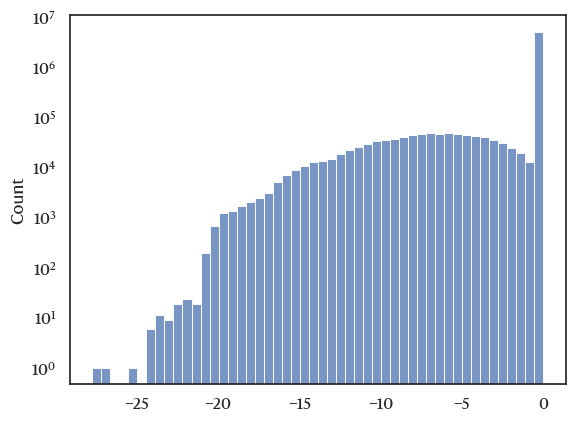

In [5]:
sns.histplot(energies_arr.flatten(), bins=50)
plt.yscale('log')

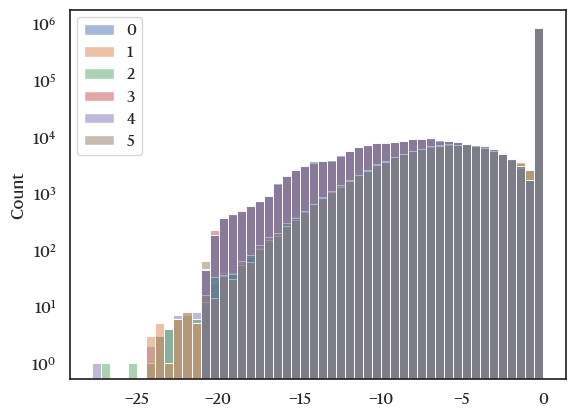

In [6]:
sns.histplot(energies_arr, bins=50)
plt.yscale('log')


Text(0.5, 1.0, 'Number of non-zero interactions per circuit')

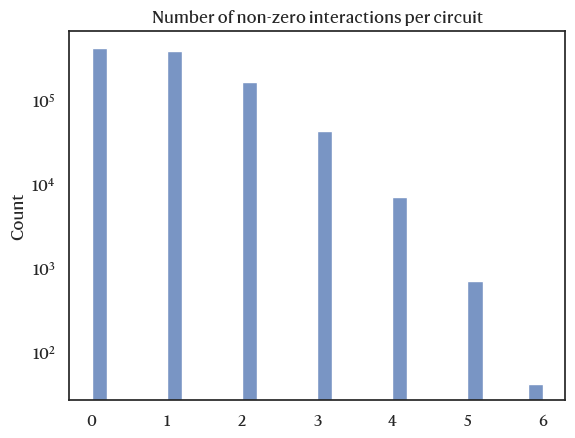

In [ ]:
sns.histplot((energies_arr < 0).sum(axis=1), bins=30)
plt.yscale('log')
plt.title('Number of non-zero interactions per circuit')